# Coding etiquete and excel reporting, Part 1, Step 9, part A

## Content list:

#### 01. Importing Libraries
#### 02. Importing Data
#### 03. Produce suitable charts to illustrate results (Question 9)
##### 03.1 Age charts
##### 03.2 Family charts
##### 03.3 Income charts
##### 03.4 Type of product charts
##### 03.5 Popular department charts
##### 03.6 Popular departments, family type charts

##### This script has the first set of visuals of the results, which continue on the following script (Coding etiquete and excel reporting, Part 1, Step 9, part B)

### 01. Importing libraries

In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing data

In [49]:
path= r'C:\Users\isobr\OneDrive\02122022Instacart Basket Analysis'

In [50]:
path

'C:\\Users\\isobr\\OneDrive\\02122022Instacart Basket Analysis'

In [51]:
cust_prof = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'normal_cust_prods.pkl'))

In [52]:
cust_prof.head(3)

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,...,family_status,income,region,activity_flag,age_flag,income_flag,family_flag,product_type,popular_products,popular_family_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,1987,3139998,138,...,married,49620,Midwest,Normal activity,Senior,Low Middle Income,Middle-Size Family,Non-Perishable Foods,"Popular - produce, eggs, dairy, snacks, drinks...",family popular - fresh and frozen
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1989,1977647,138,...,married,49620,Midwest,Normal activity,Senior,Low Middle Income,Middle-Size Family,Non-Perishable Foods,"Popular - produce, eggs, dairy, snacks, drinks...",family popular - fresh and frozen
2,907,907,Premium Sliced Bacon,106,12,20.0,1960,1960,3160996,138,...,married,49620,Midwest,Normal activity,Senior,Low Middle Income,Middle-Size Family,Perishable Foods,Regular - others,family regular - others


### 03. Produce suitable charts to illustrate results (Question 9)

In [53]:
#checking columns with which I could produce visuals
cust_prof.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id',
       'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busier_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_frequency', 'frequency_flag', 'surname',
       'Gender', 'State', 'Age', 'date_joined', 'number_dependants',
       'family_status', 'income', 'region', 'activity_flag', 'age_flag',
       'income_flag', 'family_flag', 'product_type', 'popular_products',
       'popular_family_flag'],
      dtype='object')

In [54]:
# checking orders by region
region_orders=pd.crosstab (cust_prof['order_number'], cust_prof['region'])

Text(0.5, 0, 'Orders')

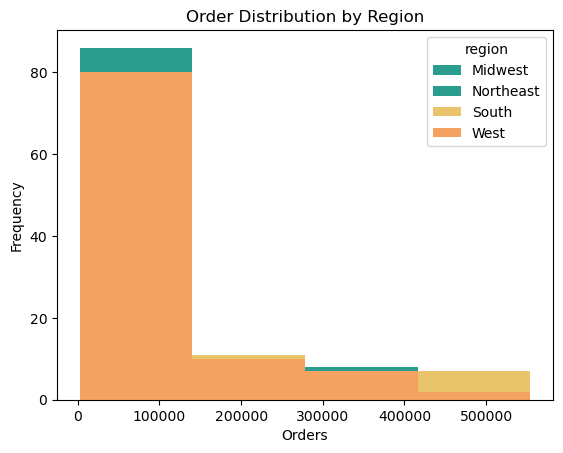

In [55]:
#visual
hist_region_orders=region_orders.plot.hist(color= ['#2a9d8f','#2a9d8f','#e9c46a','#f4a261'], bins = 4)
plt.title('Order Distribution by Region')
plt.xlabel('Orders', fontsize=10)

#### 03.1 Age charts

Text(0.5, 1.0, 'Distribution of Customers by Age Group')

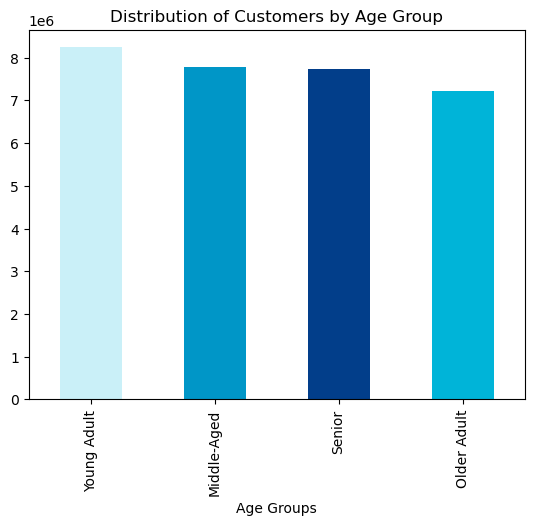

In [56]:
#creating a simple frequency bar for age groups
cust_prof['age_flag'].value_counts().plot.bar(color=['#caf0f8','#0096c7','#023e8a','#00b4d8'])
plt.xlabel("Age Groups", fontsize=10)
plt.title('Distribution of Customers by Age Group')

In [57]:
# compare age_flag and spending flag
age_spending=pd.crosstab (cust_prof['age_flag'], cust_prof['spender_flag'])

In [58]:
age_spending

spender_flag,High spender,Low spender
age_flag,,
Middle-Aged,7609534,165236
Older Adult,7074269,142396
Senior,7584693,146141
Young Adult,8092784,149511


Young adults are the highest spenders

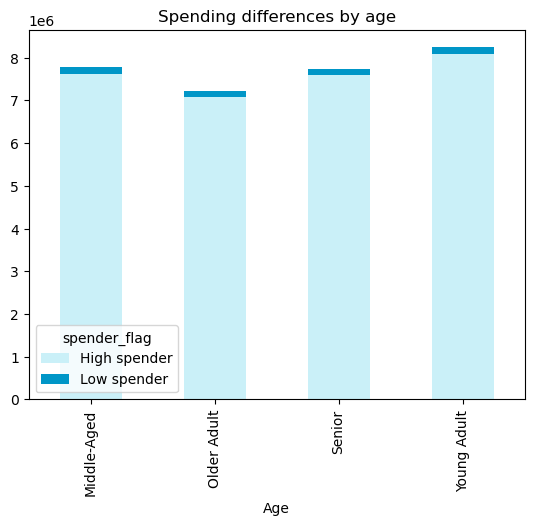

In [59]:
# create bar chart for age and spending
bar_age_spending = age_spending.plot(kind= 'bar', stacked = True,color=['#caf0f8','#0096c7'])
plt.title('Spending differences by age')
plt.xlabel('Age')
width = 0.20 

In [60]:
#saving bar
bar_age_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_spending .png'))  

In [61]:
# compare age_flag and loyalty flag
age_loyalty=pd.crosstab (cust_prof['age_flag'], cust_prof['loyalty_flag'])

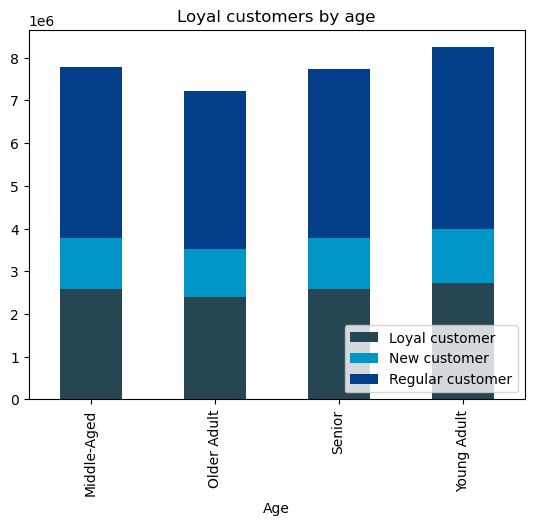

In [62]:
# create bar chart for age and spending
bar_age_loyalty = age_loyalty.plot(kind= 'bar', stacked = True, color=['#264653','#0096c7','#023e8a']) 
plt.title('Loyal customers by age')
plt.xlabel('Age')
plt.legend(loc='lower right')
width = 0.20

In [63]:
#saving bar
bar_age_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_loyalty .png'))  

There are more regular customers in the young adult and middle-age groups. Loyalty does not change much between age groups

In [64]:
#Compare age_flag and frequency_flag
age_frequency = pd.crosstab(cust_prof['age_flag'], cust_prof['frequency_flag'])

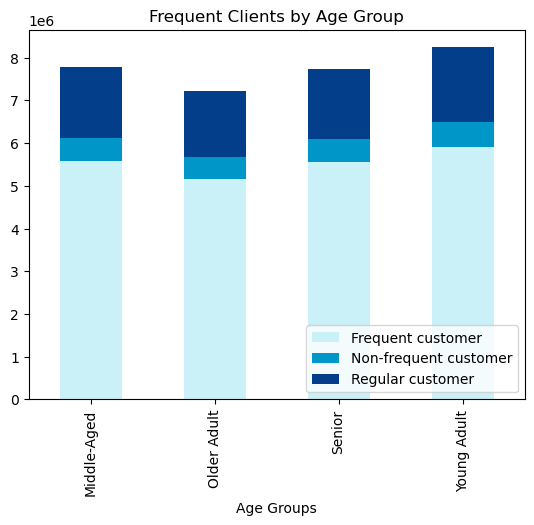

In [65]:
#Create staked bar chart to illustrate
bar_age_frequency = age_frequency.plot(kind= 'bar', stacked = True, color=['#caf0f8','#0096c7','#023e8a'])
plt.title('Frequent Clients by Age Group')
plt.xlabel('Age Groups')
plt.legend(loc='lower right')
width = 0.50 

In [66]:
#saving visual
bar_age_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_frequency.png'))                                       

In [67]:
#differences per region
age_region =pd.crosstab(cust_prof['region'], cust_prof['age_flag'])

Text(0.5, 0, 'Regions')

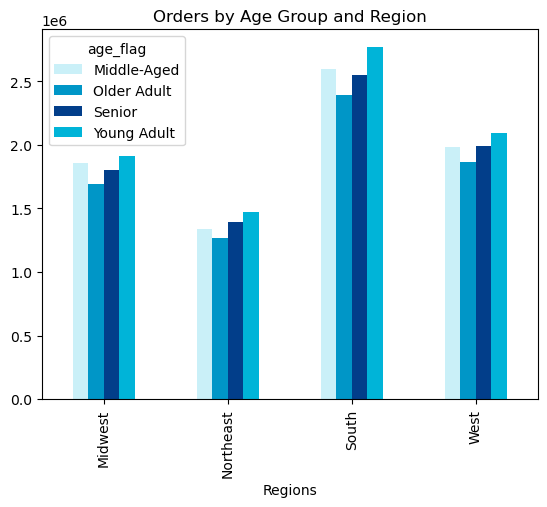

In [68]:
# create bar chart Age and Region
bar_age_region = age_region.plot.bar(color=['#caf0f8','#0096c7','#023e8a','#00b4d8'])
plt.title('Orders by Age Group and Region')
plt.xlabel('Regions')

In [69]:
#saving visual
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))  

#### 03.2 Family charts

Text(0.5, 1.0, 'Distribution of Customers by Family Size')

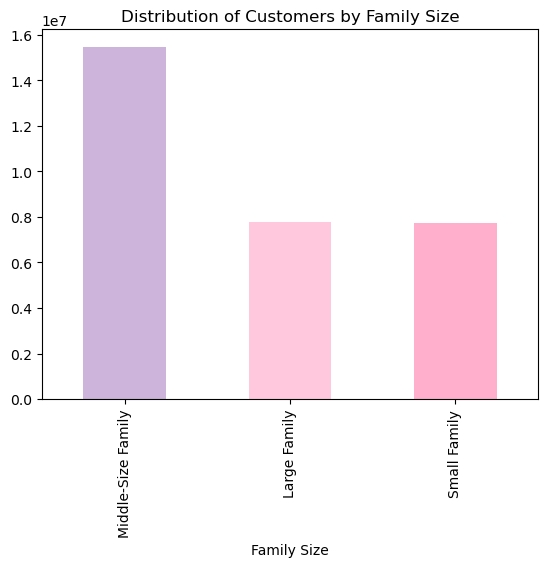

In [70]:
#creating a simple frequency bar for family
cust_prof['family_flag'].value_counts().plot.bar(color=['#cdb4db','#ffc8dd','#ffafcc'])
plt.xlabel("Family Size", fontsize=10)
plt.title('Distribution of Customers by Family Size')

In [71]:
# compare family_flag and spending flag
family_spending=pd.crosstab (cust_prof['family_flag'], cust_prof['spender_flag'])

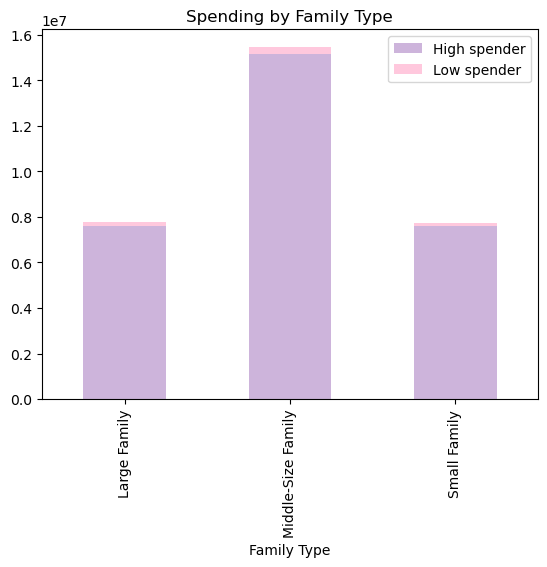

In [72]:
# create bar chart family type and spending
bar_family_spending = family_spending.plot(kind= 'bar', stacked = True, color=['#cdb4db','#ffc8dd'])
plt.title('Spending by Family Type')
plt.xlabel('Family Type')
plt.legend(loc='upper right')
width = 0.35 

In [73]:
#saving bar
bar_family_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_spending.png'))  

In [74]:
#compare family and loyalty 
family_loyalty=pd.crosstab (cust_prof['family_flag'], cust_prof['loyalty_flag'])

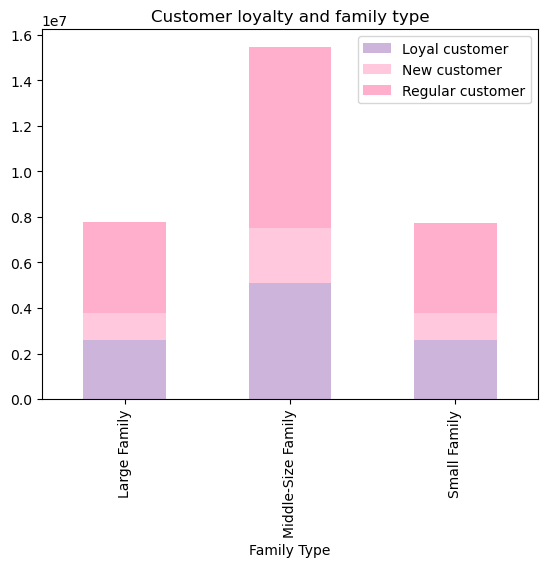

In [75]:
# create bar chart family type and spending
bar_family_loyalty = family_loyalty.plot(kind= 'bar', stacked = True,color=['#cdb4db','#ffc8dd','#ffafcc'])
plt.title('Customer loyalty and family type')
plt.xlabel('Family Type')
plt.legend(loc='upper right')
width = 0.30

In [76]:
#saving bar
bar_family_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_loyalty .png'))  

Customers in the middle-size family group are more loyal but also make up the largest share of regular customers

In [77]:
#comparing families and frequency
family_frequency=pd.crosstab (cust_prof['family_flag'], cust_prof['frequency_flag'])

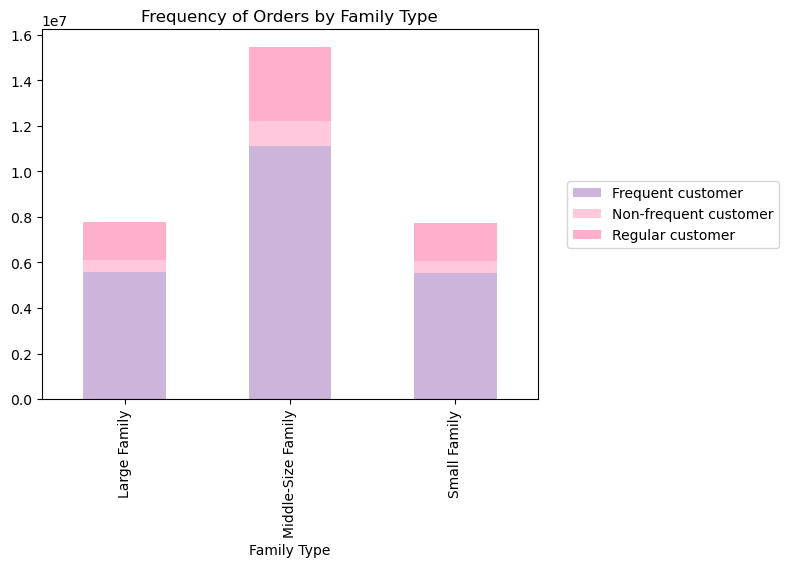

In [78]:
#now creating a visual
bar_family_frequency = family_frequency.plot(kind= 'bar', stacked = True, color=['#cdb4db','#ffc8dd','#ffafcc'])
plt.title('Frequency of Orders by Family Type')
plt.xlabel('Family Type')
bar_family_frequency.legend(loc='center right',  bbox_to_anchor=(1.5, 0.5), ncol=1)

In [79]:
#saving bar
bar_family_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_frequency .png'))  

Middle-size families are also the most frequent customers

In [80]:
#Compare families and region
family_region=pd.crosstab (cust_prof['region'], cust_prof['family_flag'])

Text(0.5, 0, 'Regions')

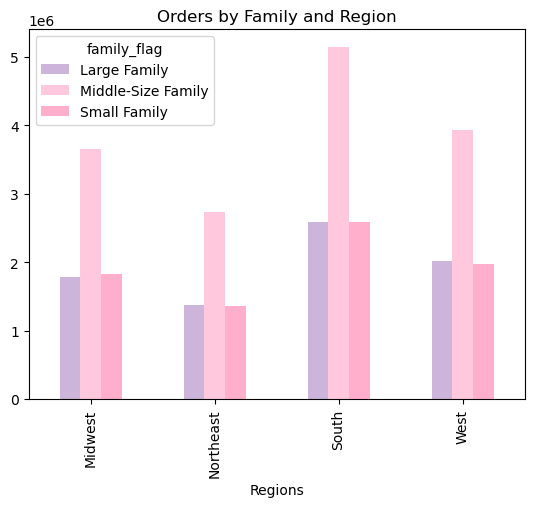

In [81]:
# create bar chart Age and Region
bar_family_region = family_region.plot.bar(color=['#cdb4db','#ffc8dd','#ffafcc'])
plt.title('Orders by Family and Region')
plt.xlabel('Regions')

In [82]:
#saving visual
bar_family_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_region.png'))  

#### 03.3 Income Charts

Text(0.5, 1.0, 'Distribution of Income')

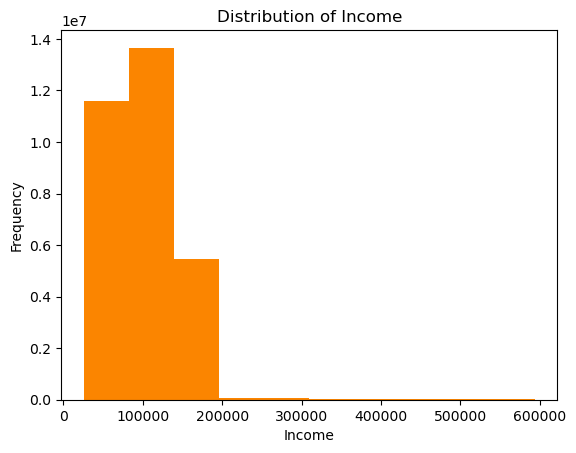

In [83]:
hist_income=cust_prof['income'].plot.hist(color='#fb8500', bins = 10)
plt.xlabel('Income', fontsize=10)
plt.title('Distribution of Income')

In [84]:
#saving visual
hist_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_income.png')) 

Text(0.5, 1.0, 'Income Classification')

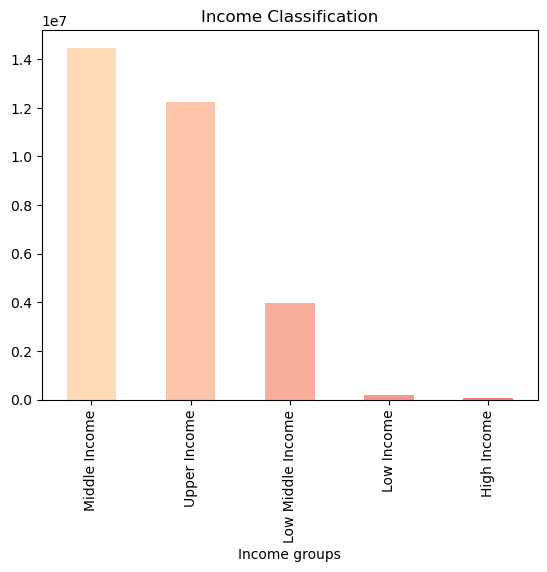

In [85]:
#creating a simple frequency bar for income groups
cust_prof['income_flag'].value_counts().plot.bar(color=['#ffdab9','#fbc4ab','#f8ad9d','#f4978e','#f08080'])
plt.xlabel("Income groups", fontsize=10)
plt.title('Income Classification')

In [86]:
#Income and spending
income_spending=pd.crosstab (cust_prof['income_flag'], cust_prof['spender_flag'])

Text(0.5, 0, 'Income')

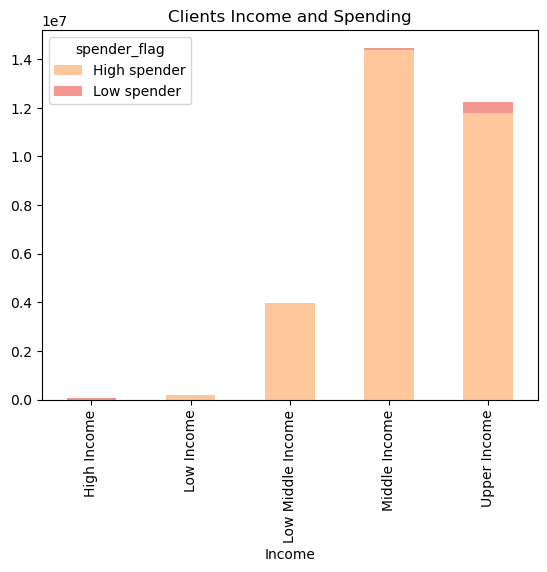

In [87]:
#creating a visual
bar_income_spending = income_spending.plot(kind= 'bar', stacked = True, color=['#fec89a','#f4978e'])
plt.title('Clients Income and Spending')
plt.xlabel('Income')

In [88]:
#saving chart
bar_income_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_spending.png'))  

In [89]:
#Income and loyalty flag
income_loyalty=pd.crosstab (cust_prof['income_flag'], cust_prof['loyalty_flag'])

Text(0.5, 0, 'Income')

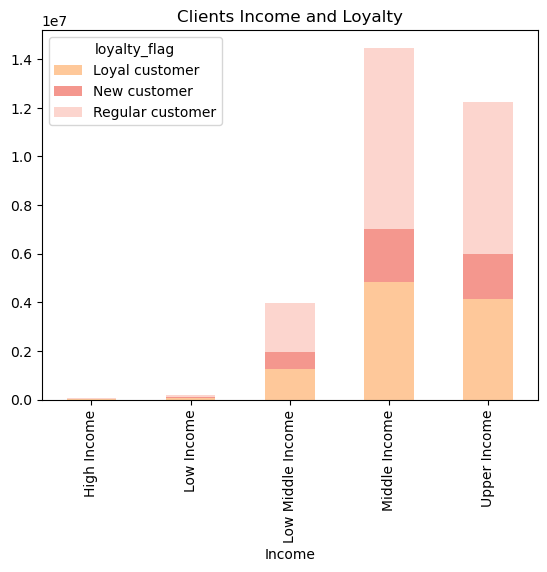

In [90]:
bar_income_loyalty = income_loyalty.plot(kind= 'bar', stacked = True, color=['#fec89a','#f4978e','#fcd5ce'])
plt.title('Clients Income and Loyalty')
plt.xlabel('Income')

In [91]:
#saving chart
bar_income_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_loyalty.png'))  

In [92]:
#compare income and frequency 
income_frequency=pd.crosstab (cust_prof['income_flag'], cust_prof['frequency_flag'])

Text(0.5, 0, 'Income')

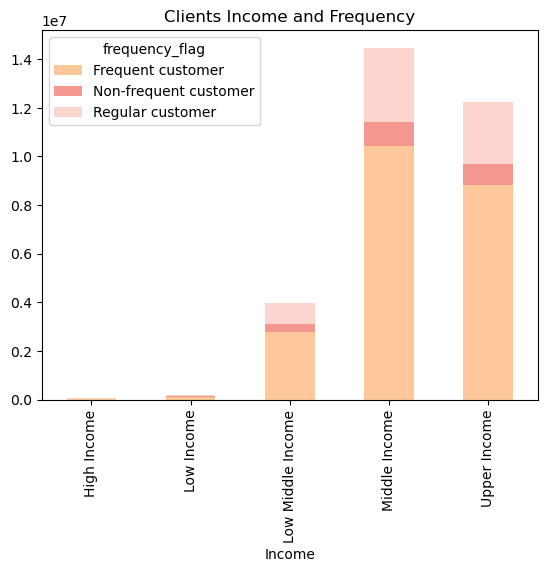

In [93]:
bar_income_frequency = income_frequency.plot(kind= 'bar', stacked = True,color=['#fec89a','#f4978e','#fcd5ce'])
plt.title('Clients Income and Frequency')
plt.xlabel('Income')

In [94]:
#saving chart
bar_income_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_frequency.png'))  

In [95]:
#Compare income and region 
income_region=pd.crosstab (cust_prof['region'], cust_prof['income_flag'])

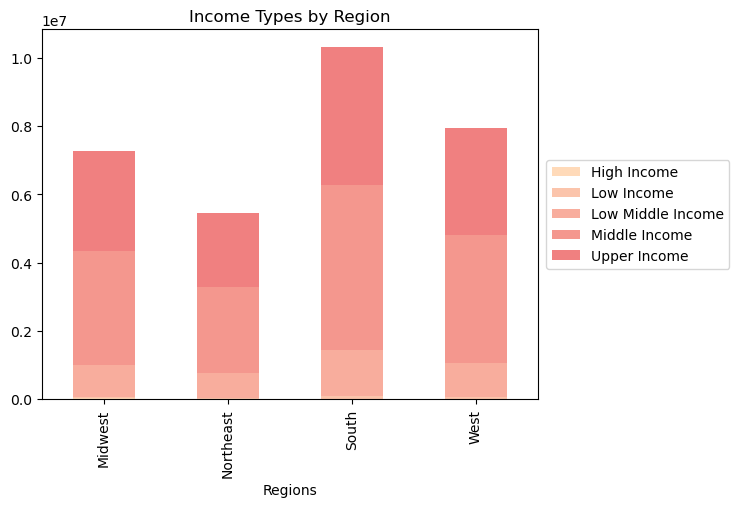

In [96]:
#create a bar chart to illustrate
bar_income_region = income_region.plot(kind= 'bar', stacked = True,color=['#ffdab9','#fbc4ab','#f8ad9d','#f4978e','#f08080'])
plt.title('Income Types by Region')
plt.xlabel('Regions')
bar_income_region.legend(loc='center right',  bbox_to_anchor=(1.4, 0.5), ncol=1)

In [97]:
#saving visual
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'))  

#### 03.4 Type of product charts

Text(0.5, 1.0, 'Distribution of Products by Type')

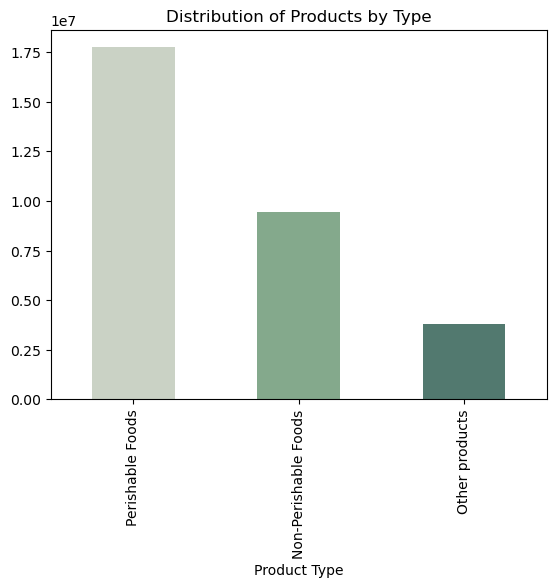

In [98]:
#creating a simple frequency bar for product type
cust_prof['product_type'].value_counts().plot.bar(color=['#cad2c5','#84a98c','#52796f'])
plt.xlabel("Product Type", fontsize=10)
plt.title('Distribution of Products by Type')

Text(0.5, 0, 'Maximum Orders')

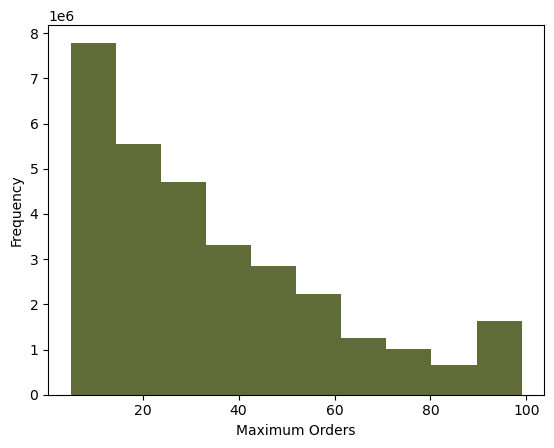

In [99]:
#simple view of order numbers per client with an histogram
hist_orders=cust_prof['max_order'].plot.hist(color='#606c38', bins = 10)
plt.xlabel('Maximum Orders', fontsize=10)

In [100]:
#saving visual
hist_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders.png')) 

In [101]:
#Compare type of product orders distribuition  and region 
product_region=pd.crosstab (cust_prof['region'], cust_prof['product_type'])

Text(0.5, 0, 'Regions')

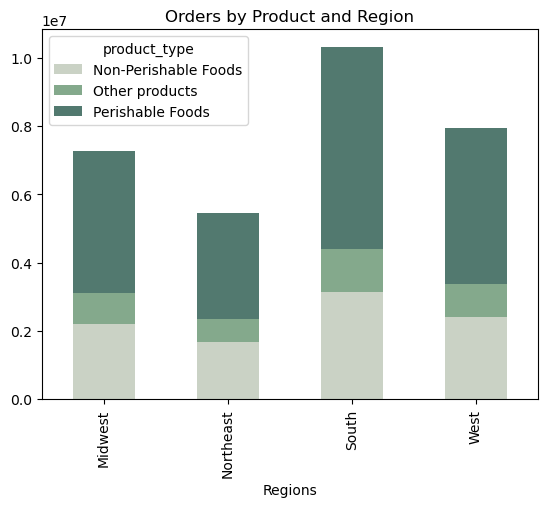

In [102]:
#create a bar chart to illustrate
bar_product_region = product_region.plot(kind= 'bar', stacked = True,color=['#cad2c5','#84a98c','#52796f'])
plt.title('Orders by Product and Region')
plt.xlabel('Regions')

In [103]:
#saving visual
bar_product_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_product_region.png')) 

In [104]:
#Compare type of product with spending flag
product_spending=pd.crosstab (cust_prof['product_type'], cust_prof['spender_flag'])

Text(0.5, 0, 'Type of Product')

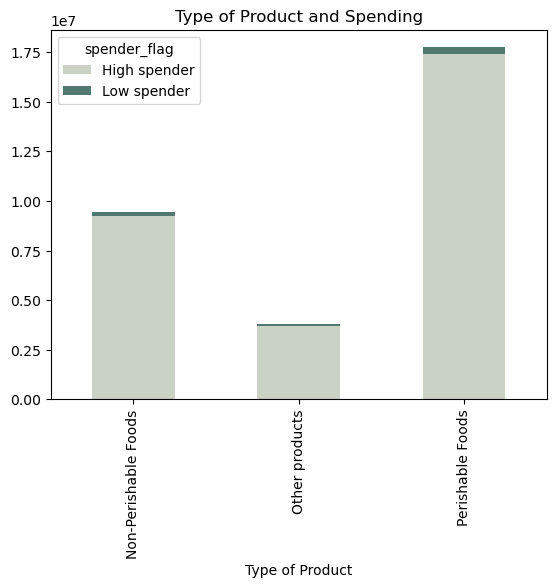

In [105]:
#creating a visual
bar_product_spending = product_spending.plot(kind= 'bar', stacked = True,color=['#cad2c5','#52796f'])
plt.title('Type of Product and Spending')
plt.xlabel('Type of Product')

Most clients spend more with perishable foods

In [106]:
# comparing type of product and frequency flag
product_frequency=pd.crosstab (cust_prof['frequency_flag'], cust_prof['product_type'])

Text(0.5, 0, 'Type of Product')

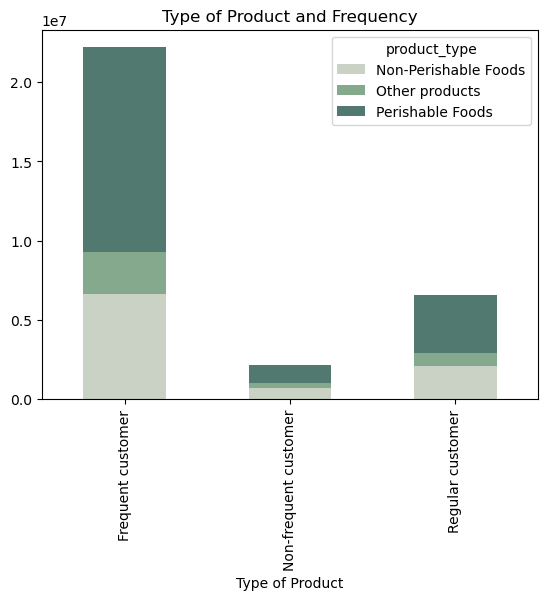

In [107]:
#creating a visual
bar_product_frequency = product_frequency.plot(kind= 'bar', stacked = True,color=['#cad2c5','#84a98c','#52796f'])
plt.title('Type of Product and Frequency')
plt.xlabel('Type of Product')

In [108]:
#saving visual
bar_product_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_product_frequency.png')) 

#### 03.5 Popular department charts

Text(0.5, 1.0, 'Distribution of Products by Popularity')

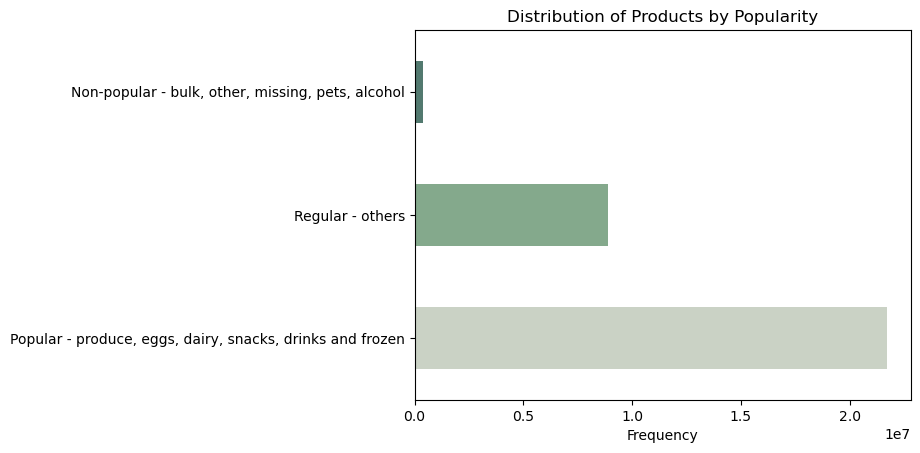

In [109]:
#creating a simple frequency bar for popular products
cust_prof['popular_products'].value_counts().plot.barh(color=['#cad2c5','#84a98c','#52796f'])
plt.xlabel("Frequency", fontsize=10)
plt.title('Distribution of Products by Popularity')

In [110]:
#compare popular departments and spending flag
dep_spending=pd.crosstab (cust_prof['spender_flag'], cust_prof['popular_products'])

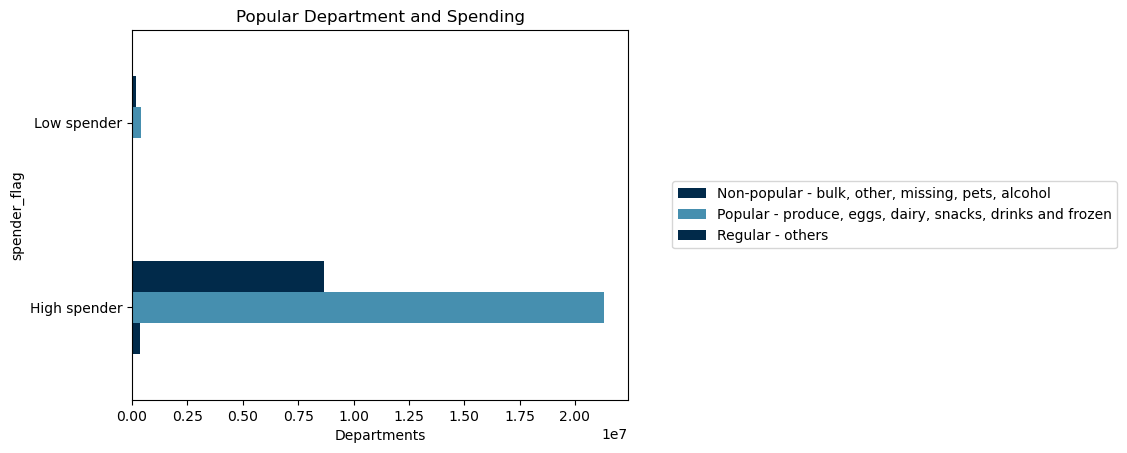

In [111]:
#creating a visual
bar_dep_spending = dep_spending.plot.barh(color=['#012a4a','#468faf'])
plt.title('Popular Department and Spending')
plt.xlabel('Departments')
bar_dep_spending.legend(loc='center right',  bbox_to_anchor=(2.0, 0.5), ncol=1)

In [112]:
#saving visual
bar_dep_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_spending.png')) 

The departments with more orders are also those where customers spend more, which is to be expected

In [113]:
#Compare department orders distribuition  and region 
department_region=pd.crosstab (cust_prof['region'], cust_prof['popular_products'])

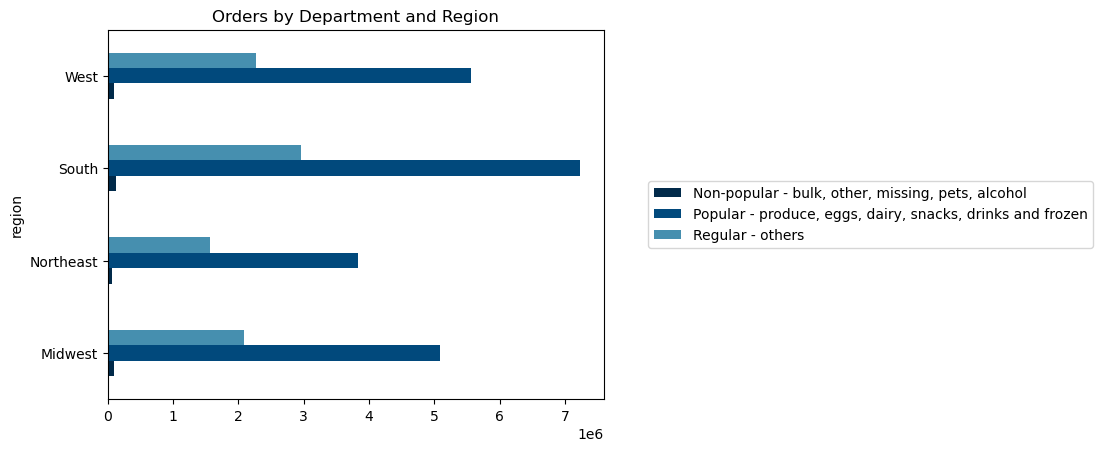

In [114]:
#create a bar chart to illustrate
bar_department_region = department_region.plot.barh(color=['#012a4a','#01497c','#468faf'])
plt.title('Orders by Department and Region')
bar_department_region.legend(loc='center right',  bbox_to_anchor=(2.0, 0.5), ncol=1)

In [115]:
#saving visual
bar_department_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_region.png')) 

#### 03.6 Popular departments, family type charts

Text(0.5, 1.0, 'Distribution of Orders by Popularity and Family Size')

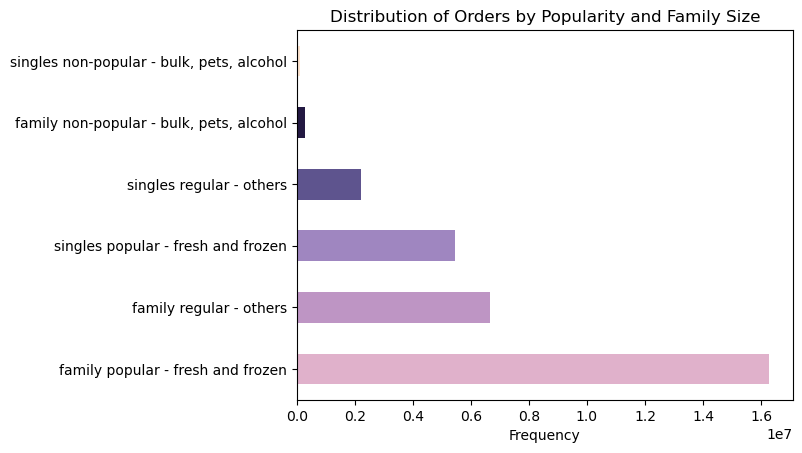

In [116]:
#creating a simple frequency bar for popular products by family type
cust_prof['popular_family_flag'].value_counts().plot.barh(color=['#e0b1cb','#be95c4','#9f86c0','#5e548e','#231942','#fde4cf'])
plt.xlabel("Frequency", fontsize=10)
plt.title('Distribution of Orders by Popularity and Family Size')

In [117]:
#Comparing popular departments with frequency flag
dep_family_frequency=pd.crosstab (cust_prof['frequency_flag'], cust_prof['popular_family_flag'])

Text(0.5, 0, 'Family type')

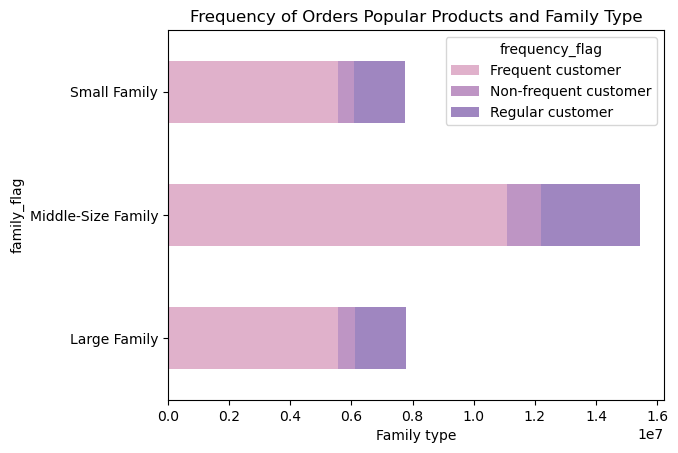

In [127]:
#creating a visual
bar_family_frequency = family_frequency.plot(kind= 'barh', stacked = True,color=['#e0b1cb','#be95c4','#9f86c0'])
plt.title('Frequency of Orders Popular Products and Family Type')
plt.xlabel('Family type')

In [119]:
#saving figure
bar_family_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_frequency.png')) 

In [120]:
#Comparing popular departments with income_flag
dep_family_income=pd.crosstab (cust_prof['popular_family_flag'], cust_prof['income_flag'])

Text(0.5, 0, 'Department Popularity')

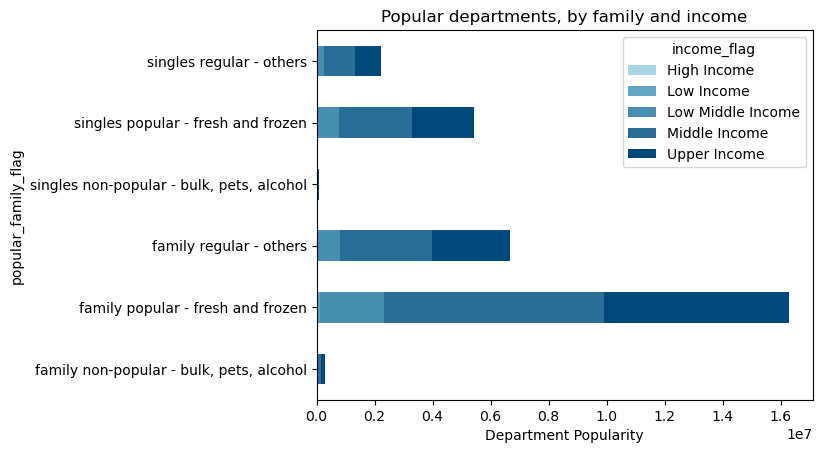

In [134]:
#creating a visual
bar_dep_family_income= dep_family_income.plot(kind= 'barh', stacked = True,color=['#a9d6e5','#61a5c2','#468faf','#2a6f97','#01497c','#013a63'])
plt.title('Popular departments, by family and income')
plt.xlabel('Department Popularity')

In [122]:
#saving figure
bar_dep_family_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_family_income.png'))

In [123]:
#Comparing popular departments with loyalty_flag
dep_family_loyalty=pd.crosstab (cust_prof['popular_family_flag'], cust_prof['loyalty_flag'])

Text(0.5, 0, 'Department Popularity')

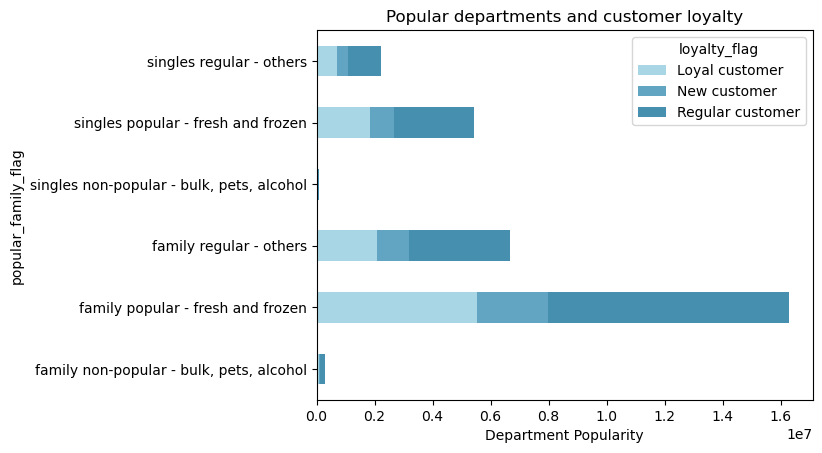

In [133]:
#creating a visual
bar_dep_family_loyalty= dep_family_loyalty.plot(kind= 'barh', stacked = True,color=['#a9d6e5','#61a5c2','#468faf'])
plt.title('Popular departments and customer loyalty')
plt.xlabel('Department Popularity')

In [125]:
#saving figure
bar_dep_family_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_family_loyalty.png'))

In [126]:
#Compare department orders/family type distribuition  and region 
dep_family_region=pd.crosstab (cust_prof['region'], cust_prof['popular_family_flag'])

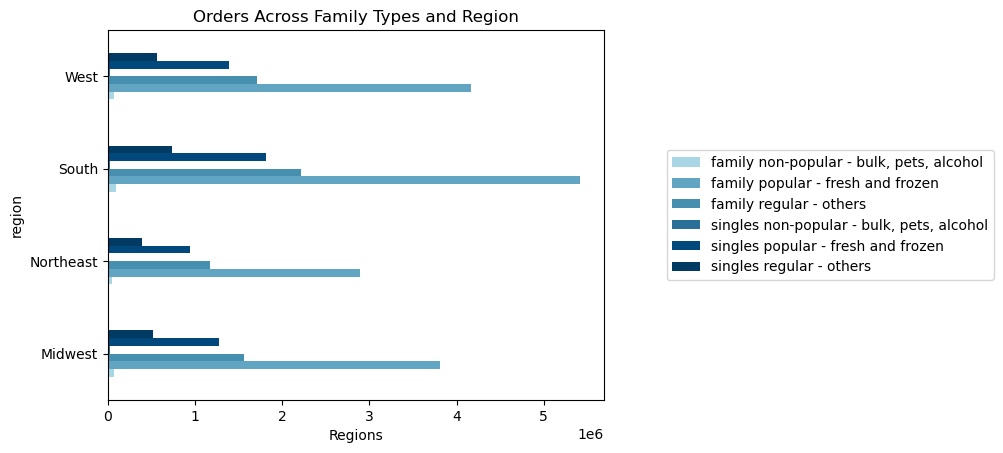

In [132]:
#create a bar chart to illustrate
bar_dep_family_region = dep_family_region.plot.barh(color=['#a9d6e5','#61a5c2','#468faf','#2a6f97','#01497c','#013a63'])
plt.title('Orders Across Family Types and Region')
plt.xlabel('Regions')
bar_dep_family_region.legend(loc='center right',  bbox_to_anchor=(1.8, 0.5), ncol=1)

In [73]:
#saving figure
bar_dep_family_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_family_region.png'))